In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from scflowpy import *
import lib

In [4]:
adata = read_sce("/home/ckhozoie/Documents/junk/final_sce")

╔═══════════════════════════════════════════════════════════════════════════════════════════╗
║                               Reading SingleCellExperiment                                ║
╚═══════════════════════════════════════════════════════════════════════════════════════════╝

Reading sparse matrix: /home/ckhozoie/Documents/junk/final_sce/matrix.mtx.gz

Reading observation data:  /home/ckhozoie/Documents/junk/final_sce/sce-coldata.tsv

Reading variable data:  /home/ckhozoie/Documents/junk/final_sce/sce-rowdata.tsv

Reading reduced dimension matrices

Reading embedding: /home/ckhozoie/Documents/junk/final_sce/ReducedDim_UMAP3D_PCA.tsv

Reading embedding: /home/ckhozoie/Documents/junk/final_sce/ReducedDim_PCA_PB.tsv

Reading embedding: /home/ckhozoie/Documents/junk/final_sce/ReducedDim_UMAP_PCA_PB.tsv

Reading embedding: /home/ckhozoie/Documents/junk/final_sce/ReducedDim_PCA.tsv

Reading embedding: /home/ckhozoie/Documents/junk/final_sce/ReducedDim_tSNE_PCA.tsv

Reading embedding: /home/ckhozoie/Documents/junk/final_sce/ReducedDim_Liger.tsv

Reading embedding: /home/ckhozoie/Documents/junk/final_sce/ReducedDim_UMAP_PCA.tsv

Reading embedding: /home/ckhozoie/Documents/junk/final_sce/ReducedDim_tSNE_Liger.tsv

Reading embedding: /home/ckhozoie/Documents/junk/final_sce/ReducedDim_UMAP_Liger.tsv

Reading embedding: /home/ckhozoie/Documents/junk/final_sce/ReducedDim_UMAP3D_Liger.tsv

Imported SingleCellExperiment as AnnData Object

In [4]:
print(("[u][bold cyan]Reading SingleCellExperiment[/bold cyan][/u]"))

Reading SingleCellExperiment

In [30]:
coltypes = pd.read_csv("/home/ckhozoie/Documents/junk/final_sce/scecoldata_classes.tsv", header=0, sep='\t')
r2py_types_map_d = {
    'factor' : 'category',
    'character' : 'category',
    'integer' : 'int64',
    'numeric' : 'float'
}

for col in ['parks', 'playgrounds', 'sports', 'roading']:
    public[col] = public[col].astype('category')


,barcode,factor
0,manifest,factor
1,individual,factor
2,diagnosis,factor
3,sex,factor
4,age,integer
5,total_counts,numeric
6,total_features_by_counts,integer
7,pc_mito,numeric
8,pc_ribo,numeric
9,clusters,factor


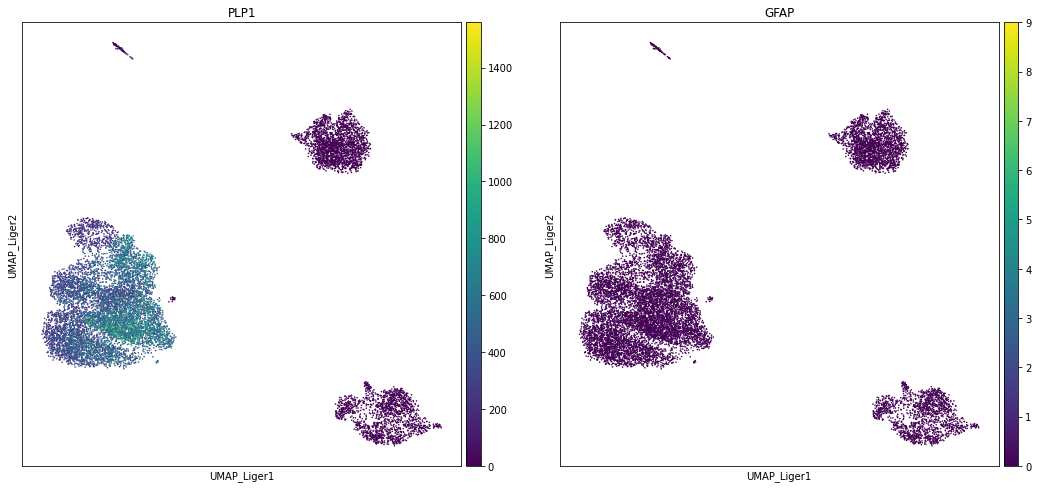

In [12]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context
# rc_context is used for the figure size, in this case 4x4
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.embedding(adata, "UMAP_Liger", color = ["PLP1", "GFAP"])

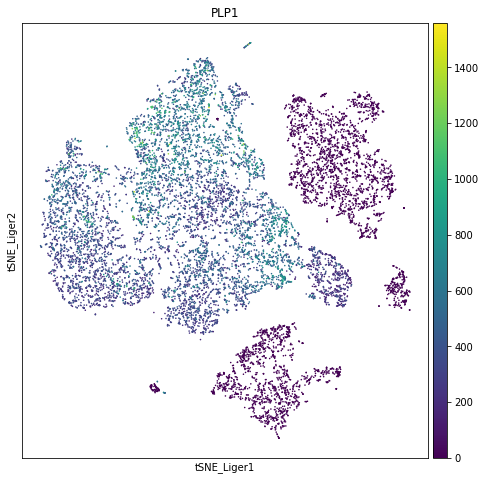

In [9]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context
# rc_context is used for the figure size, in this case 4x4
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.embedding(adata, "tSNE_Liger", color = "PLP1")

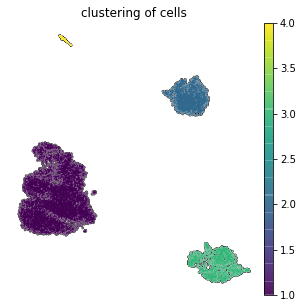

In [21]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.embedding(adata, "UMAP_Liger", color='clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=72, legend_fontoutline=22,frameon=False,
               title='clustering of cells', palette='Set1')

In [16]:
from rich.markdown import Markdown
print(Markdown("# Reading SingleCellExperiment"))

╔═══════════════════════════════════════════════════════════════════════════════════════════╗
║                               Reading SingleCellExperiment                                ║
╚═══════════════════════════════════════════════════════════════════════════════════════════╝

In [27]:
marker_genes_dict = {
    'Oligo': ['PLP1'],
    'Dendritic': ['CST3']
}

In [28]:
sc.pl.dotplot(adata, marker_genes_dict, 'clusters', dendrogram=True)

ValueError: groupby has to be a categorical observation. Given value: clusters, Column type: int64